In [1]:
from os.path import join

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

In [6]:
save_plots = False
plots_format = "pdf"

In [3]:
df = pd.read_excel(
    join(
        r"/media/medical/projects/head_and_neck/onkoi_2019", "SOTA_results_stacked.xlsx"
    ),
    engine="openpyxl",
    header=[0],
    index_col=0,
)
df["OAR"].replace({"nII_L": "Optic_nerve_L", "nII_R": "Optic_nerve_R"}, inplace=True)
df

,bib_code,first_author,year,Dataset,Modality,OAR,Comments,vol_DSC
0,Ibragimov2017SegmentationNetworks:,Ibragimov,2017,Private,CT,Chiasm,NaN,37.40
1,Ibragimov2017SegmentationNetworks:,Ibragimov,2017,Private,CT,Eye_L,NaN,88.40
2,Ibragimov2017SegmentationNetworks:,Ibragimov,2017,Private,CT,Eye_R,NaN,87.70
3,Ibragimov2017SegmentationNetworks:,Ibragimov,2017,Private,CT,Gl_SMB_L,NaN,69.70
4,Ibragimov2017SegmentationNetworks:,Ibragimov,2017,Private,CT,Gl_SMB_R,NaN,73.00
...,...,...,...,...,...,...,...,...
411,Tang2019ClinicallyImages,Tang,2019,Multiple datasets,CT,Temporal_Lobe_R,NaN,84.13
412,Tang2019ClinicallyImages,Tang,2019,Multiple datasets,CT,Thyroid,NaN,85.62
413,Tang2019ClinicallyImages,Tang,2019,Multiple datasets,CT,TMJ_L,NaN,87.96
414,Tang2019ClinicallyImages,Tang,2019,Multiple datasets,CT,TMJ_R,NaN,86.86


In [4]:
# PDDCA heatmap
df_pddca = df[df["Dataset"] == "PDDCA"].copy(deep=True)
df_pddca = df_pddca.pivot(
    index=["bib_code", "first_author", "year", "Modality", "Comments"],
    columns="OAR",
    values="vol_DSC",
)
df_pddca.sort_index(level=["year", "first_author"], ascending=True, inplace=True)
df_pddca["name"] = (
    df_pddca.index.get_level_values("first_author").astype(str)
    + " et al., "
    + df_pddca.index.get_level_values("year").astype(str)
)
citations_matching = [
    f"{name}: " + r"\cite{" + bib + "}"
    for name, bib in zip(
        df_pddca["name"].to_list(),
        df_pddca.index.get_level_values("bib_code").to_list(),
    )
]
print(", ".join(list(dict.fromkeys(citations_matching))))
df_pddca.set_index("name", drop=True, inplace=True)
# df_pddca["AVG"] = df_pddca.mean(axis=1)
# df_pddca.loc["AVG", :] = df_pddca.mean(axis=0)
df_pddca = df_pddca[['Gl_parotid_L', 'Gl_parotid_R']]
df_pddca = df_pddca.loc[df_pddca.notna().any(axis=1)]
df_pddca.loc["OUR model 1)", :] = [89.2, 89.5]
df_pddca.loc["OUR model 2)", :] = [88.9, 89.6]
df_pddca

Fritscher et al., 2016: \cite{Fritscher2016DeepImages}, Hansch et al., 2018: \cite{Hansch2018EvaluationImages}, Nikolov et al., 2018: \cite{Nikolov2018DeepRadiotherapy}, Ren et al., 2018: \cite{Ren2018InterleavedImages}, Tong et al., 2018: \cite{Tong2018FullyNetworks}, Zhu et al., 2018: \cite{Zhu2018AnatomyNet:Anatomy}, Tang et al., 2019: \cite{Tang2019ClinicallyImages}, Tappeiner et al., 2019: \cite{Tappeiner2019Multi-organApproach}, Tong et al., 2019: \cite{Tong2019ShapeImages}, Gou et al., 2020: \cite{Gou2020Self-channel-and-spatial-attentionImages}, Yang et al., 2020: \cite{Yang2020SyntheticPlanning}, Gao et al., 2021: \cite{Gao2021FocusNetv2:Images}, Veeraraghavan et al., 2021: \cite{Veeraraghavan2021Nested-blockSegmentation}


OAR,Gl_parotid_L,Gl_parotid_R
name,,
"Fritscher et al., 2016",81.00,81.00
"Hansch et al., 2018",88.00,NaN
"Nikolov et al., 2018",88.10,86.60
"Tong et al., 2018",83.49,83.18
"Zhu et al., 2018",88.07,87.35
"Tang et al., 2019",88.70,87.50
"Tappeiner et al., 2019",80.00,81.00
"Tong et al., 2019",85.49,85.77
"Gou et al., 2020",87.00,86.00


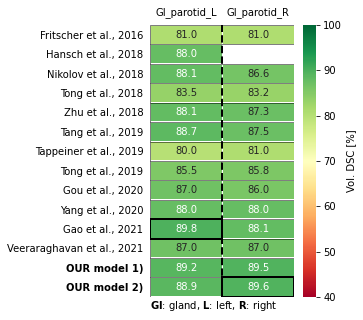

In [7]:
plt.close("all")
plt.figure(figsize=(3, 5))
ax = sns.heatmap(
    df_pddca,
    square=False,
    cmap="RdYlGn",
    annot=True, 
    annot_kws={"ha": 'center',"va": 'center'},
    fmt=".1f",
    linewidths=0.5,
    vmin=df_pddca.min().min() if df_pddca.min().min() < 40 else 40,
    vmax=100,
    cbar_kws={"fraction": 0.09},
)
plt.tick_params(
    axis="both",
    which="major",
    labelsize=10,
    labelbottom=False,
    bottom=False,
    top=False,
    labeltop=True,
    left=False,
)
ax.collections[0].colorbar.set_label("Vol. DSC [%]")
ax.hlines(
    list(range(df_pddca.shape[0])),
    *ax.get_xlim(),
    colors="k",
    linewidth=0.5,
    linestyles="solid",
)
ax.vlines(
    list(range(df_pddca.shape[1] - 1)),
    *ax.get_ylim(),
    colors="k",
    linewidth=0.5,
    linestyles="solid",
)
# ax.hlines(
#     [df_pddca.shape[0] - 2],
#     *ax.get_xlim(),
#     colors="k",
#     linewidth=2,
#     linestyles="dashed",
# )
ax.vlines(
    [df_pddca.shape[1] - 1],
    *ax.get_ylim(),
    colors="k",
    linewidth=2,
    linestyles="dashed",
)
ax.set_xlabel("")
ax.set_ylabel("")

# bold cells that include best result for organ
tmp = df_pddca.copy(deep=True).reset_index(drop=True)
for e, i in enumerate(tmp.idxmax(axis=0)):
    ax.add_patch(Rectangle((e, i), 1, 1, fill=False, edgecolor="k", lw=2))

oar_abbrev = {
    "Gl": "gland",
    "SMG": "submandibular gland",
    "TMJ": "temporomandibular joint",
    "PCM": "pharyngeal constrictor muscles",
    "Inf": "inferior",
    "Mid": "medial",
    "Sup": "superior",
    "Lx": "larynx",
    "L": "left",
    "R": "right",
}

# print abbreviations description at the bottom of the figure
abbrevs_used = [
    i for i in list(oar_abbrev.keys()) for n in df_pddca.columns.to_list() if i in n
]
sorting_dict = dict(zip(oar_abbrev.keys(), list(range(len(oar_abbrev.keys())))))
abbrevs_used = list(set(abbrevs_used))
abbrevs_num = [sorting_dict[i] for i in abbrevs_used]
abbrevs_used = [x for _, x in sorted(zip(abbrevs_num, abbrevs_used))]
s = [
    r"$\bf{{{key}}}$: {value}".format(key=i, value=oar_abbrev[i]) for i in abbrevs_used
]
plt.text(0, df_pddca.shape[0] + 0.1, ", ".join(s), fontsize=10, ha="left", va="top")

[label.set_fontweight('bold') for label in ax.get_yticklabels()[-2:]]

# plt.show()
# plt.savefig(
#     join(remote_config.project_reports_dir_path, f"{figure_name}.{plot_format}"),
#     bbox_inches="tight",
# )
if save_plots: plt.savefig(f'figures/SPIE_PDDCA_benchmarking.{plots_format}', bbox_inches = 'tight', facecolor='white')


Ibragimov et al., 2017: \cite{Ibragimov2017SegmentationNetworks:}, Hansch et al., 2018: \cite{Hansch2018EvaluationImages}, Mocnik et al., 2018: \cite{Mocnik2018SegmentationImages}, Nikolov et al., 2018: \cite{Nikolov2018DeepRadiotherapy}, Willems et al., 2018: \cite{Willems2018ClinicalRadiotherapy}, Zhu et al., 2018: \cite{Zhu2018AnatomyNet:Anatomy}, Chan et al., 2019: \cite{Chan2019ALearning}, Chen et al., 2019: \cite{Chen2019ARadiotherapy}, Heyden et al., 2019: \cite{vanderHeyden2019Dual-energyApproach}, Rhee et al., 2019: \cite{Rhee2019AutomaticNetworks}, Rooij et al., 2019: \cite{vanRooij2019DeepEvaluation}, Sun et al., 2019: \cite{Sun2019AccurateRadiotherapy}, Tang et al., 2019: \cite{Tang2019ClinicallyImages}, Tong et al., 2019: \cite{Tong2019ShapeImages}, Veen et al., 2019: \cite{vanderVeen2019BenefitsCancer}, Dai et al., 2020: \cite{Dai2020SyntheticRadiotherapy}, Kieselmann et al., 2020: \cite{Kieselmann2020CrossmodalityOnly}, Wandewinckle et al., 2020: \cite{Vandewinckele2020S

NameError: name 'dataset_config' is not defined

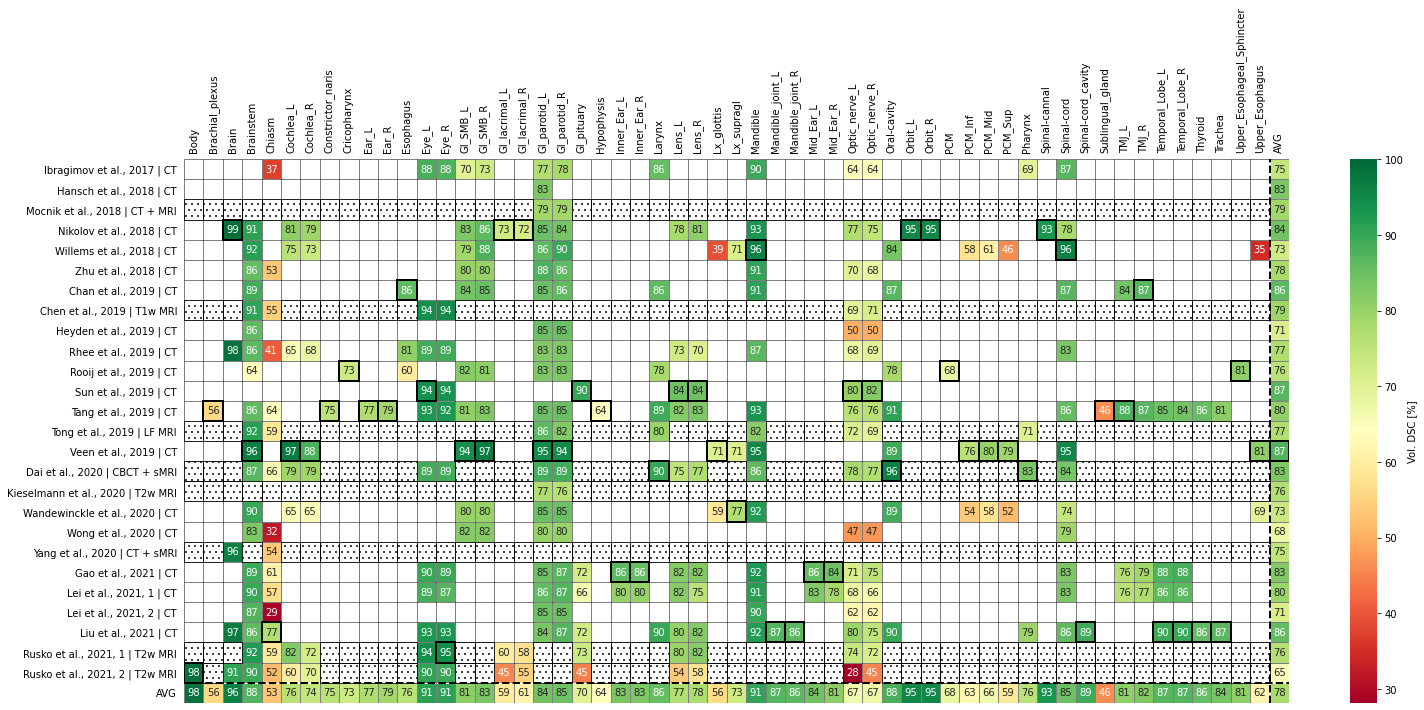

In [6]:
# PRIVATE datasets heatmap
figure_name = "private_dataset_results"

df_private = df[df["Dataset"] != "PDDCA"].copy(deep=True)
df_private["dataset_id"] = ""
for unique_bib_code in df_private["bib_code"].unique():
    unique_datasets = df_private.loc[df_private["bib_code"] == unique_bib_code][
        "Dataset"
    ].unique()
    if unique_datasets.shape[0] > 1:
        dataset_list = df_private.loc[df_private["bib_code"] == unique_bib_code][
            "Dataset"
        ].tolist()
        for enum, dataset in enumerate(unique_datasets):
            dataset_list = [
                ", " + str(enum + 1) if i == dataset else i for i in dataset_list
            ]
        df_private.loc[
            df_private["bib_code"] == unique_bib_code, "dataset_id"
        ] = dataset_list
df_private = df_private.pivot(
    index=["bib_code", "first_author", "year", "dataset_id", "Modality"],
    columns="OAR",
    values="vol_DSC",
)
df_private.sort_index(level=["year", "first_author"], ascending=True, inplace=True)
df_private["name"] = (
    df_private.index.get_level_values("first_author").astype(str)
    + " et al., "
    + df_private.index.get_level_values("year").astype(str)
)
modalities = df_private.index.get_level_values("Modality").tolist()
citations_matching = [
    f"{name}: " + r"\cite{" + bib + "}"
    for name, bib in zip(
        df_private["name"].to_list(),
        df_private.index.get_level_values("bib_code").to_list(),
    )
]
print(", ".join(list(dict.fromkeys(citations_matching))))
df_private["name"] = (
    df_private["name"]
    + df_private.index.get_level_values("dataset_id").astype(str)
    + " | "
    + df_private.index.get_level_values("Modality").astype(str)
)
df_private.set_index("name", drop=True, inplace=True)
df_private["AVG"] = df_private.mean(axis=1)
df_private.loc["AVG", :] = df_private.mean(axis=0)


plt.close("all")
plt.figure(figsize=(22, 10))
ax = sns.heatmap(
    df_private,
    square=False,
    cmap="RdYlGn",
    annot=True,
    linewidths=0.5,
    vmin=df_private.min().min() if df_private.min().min() < 40 else 40,
    vmax=100,
    cbar_kws={"fraction": 0.05},
)
plt.tick_params(
    axis="both",
    which="major",
    labelsize=10,
    labelbottom=False,
    bottom=False,
    top=False,
    labeltop=True,
    left=False,
)
ax.tick_params(axis="x", rotation=90)
ax.collections[0].colorbar.set_label("Vol. DSC [%]")
ax.set_xlabel("")
ax.set_ylabel("")
ax.hlines(
    list(range(df_private.shape[0] - 1)),
    *ax.get_xlim(),
    colors="k",
    linewidth=0.5,
    linestyles="solid",
)
ax.vlines(
    list(range(df_private.shape[1] - 1)),
    *ax.get_ylim(),
    colors="k",
    linewidth=0.5,
    linestyles="solid",
)
ax.hlines(
    [df_private.shape[0] - 1],
    *ax.get_xlim(),
    colors="k",
    linewidth=2,
    linestyles="dashed",
)
ax.vlines(
    [df_private.shape[1] - 1],
    *ax.get_ylim(),
    colors="k",
    linewidth=2,
    linestyles="dashed",
)

# bold cells that include best result for organ
tmp = df_private.copy(deep=True).reset_index(drop=True)
for e, i in enumerate(tmp.idxmax(axis=0)):
    ax.add_patch(Rectangle((e, i), 1, 1, fill=False, edgecolor="k", lw=2))

# add background effects to empty cells in rows that include results on MRI images
isMRI = np.array(["MRI" in i for i in df_private.index.tolist()]).reshape(-1, 1)
to_draw = np.repeat(isMRI, df_private.shape[1], axis=1) & df_private.isna().values
for e, (i, j) in enumerate(zip(*np.where(to_draw))):
    ax.add_patch(Rectangle((j, i), 1, 1, fill=False, hatch="..", alpha=0.75))

# print abbreviations description at the bottom of the figure
abbrevs_used = [
    i
    for i in list(oar_abbrev.keys())
    for n in df_private.columns.to_list()
    if i in n
]  # check which abbrevs are used in heatmap
sorting_dict = dict(
    zip(
        oar_abbrev.keys(),
        list(range(len(oar_abbrev.keys()))),
    )
)  # prepare for sorting abbrevs to match the order as defined in dataset_config
abbrevs_used = list(set(abbrevs_used))  # get unique
abbrevs_num = [sorting_dict[i] for i in abbrevs_used]
abbrevs_used = [x for _, x in sorted(zip(abbrevs_num, abbrevs_used))]
s = [
    r"$\bf{{{key}}}$: {value}".format(key=i, value=oar_abbrev[i])
    for i in abbrevs_used
]

modals_used = [
    i
    for i in list(dataset_config.modalities_abbrev.keys())
    for n in df_private.index.to_list()
    if i in n
]
modals_used = list(set(modals_used))
s2 = [
    r"$\bf{{{key}}}$: {value}".format(
        key=i.replace(" ", r"\;"), value=dataset_config.modalities_abbrev[i]
    )
    for i in modals_used
]

plt.text(
    0,
    df_private.shape[0] + 0.1,
    ", ".join(s) + " | " + ", ".join(s2),
    fontsize=10,
    wrap=False,
    ha="left",
    va="top",
)
# plt.title('Rezultati na podatkovni bazi PDDCA')
# plt.show()
# plt.savefig(
#     join(remote_config.project_reports_dir_path, f"{figure_name}.{plot_format}"),
#     bbox_inches="tight",
# )